In [4]:
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [18]:
def build_autoencoder(input_shape,encoding_dims = 64):
    input_layer = layers.Input(shape=input_shape)
    encoding_layer = layers.Dense(encoding_dims,activation='relu')(input_layer)
    decoding_layer = layers.Dense(input_shape[0],activation='sigmoid')(encoding_layer)

    autoencoder = models.Model(inputs=input_layer,outputs=decoding_layer)
    encoder = models.Model(inputs=input_layer,outputs = encoding_layer)
    decoder_input = layers.Input(shape=(encoding_dims,))
    decoder = models.Model(inputs=decoder_input,outputs = autoencoder.layers[-1](decoder_input))

    return (autoencoder,encoder,decoder) 



In [12]:
(x_train,_),(x_test,_) = mnist.load_data()
print((x_train.shape,x_test.shape))

((60000, 28, 28), (10000, 28, 28))


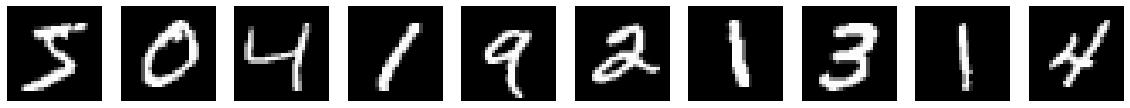

In [15]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
m,h,w = x_train.shape
x_train = x_train.reshape(m,h*w)
m,h,w = x_test.shape
x_test = x_test.reshape(m,h*w)

In [19]:
autoencoder,encoder,decoder = build_autoencoder(x_train[0].shape)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=100,batch_size=256)

2021-07-23 17:44:34.312438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-23 17:44:34.334346: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2894680000 Hz


Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2456
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1416
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1157
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1018
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0932
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0874
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0834
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0806
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0788
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0775
Epoch 11/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0766
Epoch 12/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0759
Epoch 13/100


In [20]:
result = autoencoder.evaluate(x_test,x_test)
print(result)

313/313 [==============================] - 1s 2ms/step - loss: 0.0721
0.07211178541183472


In [21]:
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)
output_imgs = decoded_imgs.reshape(len(decoded_imgs),28,28)
print(output_imgs.shape)

(10000, 64)
(10000, 784)
(10000, 28, 28)


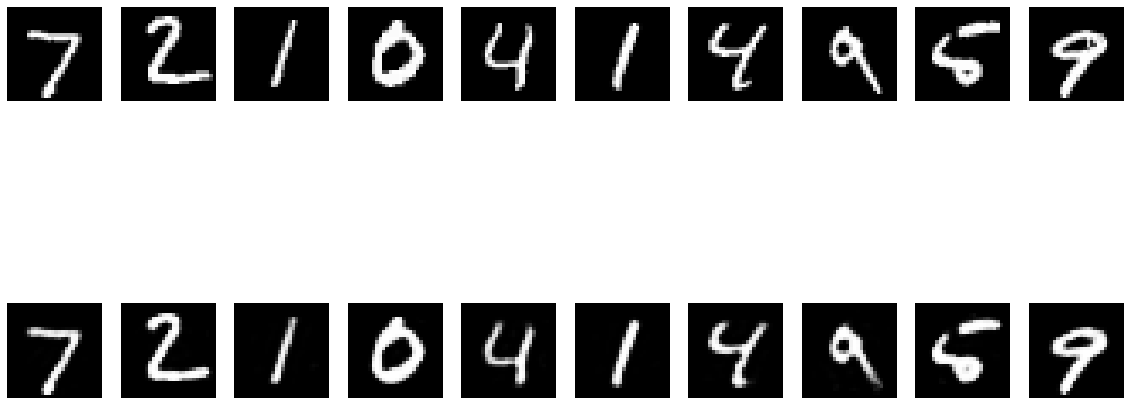

In [24]:
input_imgs = x_test.reshape(10000,28,28)
n = 10
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(input_imgs[i],cmap='gray')
    plt.axis('off')

    plt.subplot(2,n,i+1+n)
    plt.imshow(output_imgs[i],cmap='gray')
    plt.axis('off')
plt.show()
